# Computer Vision - Laboratory

## Practicum 1: Basics on Image Processing and Manipulation

The main topics are:
1. Image loading, saving and creation
2. Color manipulation 

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

Comment your solutions!

### Packages loading 

First we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [1]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [2]:
%matplotlib inline

### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 150 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 

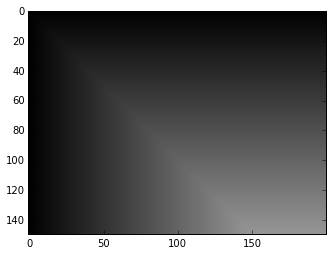

In [3]:
arr = np.zeros((150,200), dtype="uint8")
for i in range(0,arr.shape[0]):
    for j in range(0,arr.shape[1]):
        if i > 0 and j > 0:
            arr[i,j] = arr[i-1,j-1]+1
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()


How many values can each pixel have in this case? 

2^8 = 256 values

b) Change the color of the pixels of the image in such a way that the left half is black (0) and the right half is white (255). 

Visualize the image and print the values of its first row.

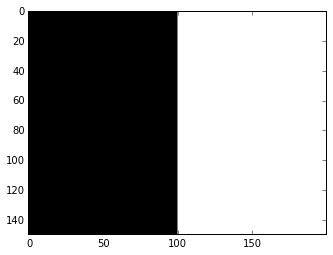

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255]


In [71]:
arr = np.zeros((150,200), dtype="uint8")
arr[:,100:] =+255
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

print arr[0]



### 1.2 Image saving and loading

a) Use the IO image package to save the image previously created:

In [5]:
io.imsave('images/half_black_white.bmp',arr)

b) Load the saved image and visualize it:

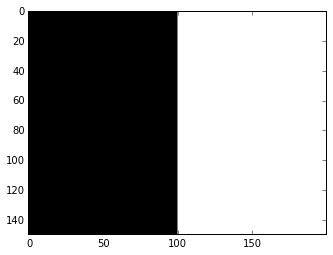

In [6]:
img = io.imread('images/half_black_white.bmp')
plt.imshow(img, cmap='gray') 
plt.show()

### 1.3 Color image manipulation

a) Load and show the image `lenna.jpg`, and check its dimensions.

**Note:** Pictures may appear in the figure with pseudocolors. Use (imread,im,cmap='rgb') to display them in RGB color and (imread,im,cmap='gray') to display them in grayscale. For more information, check the color maps available in the documentation. Comment your solution.

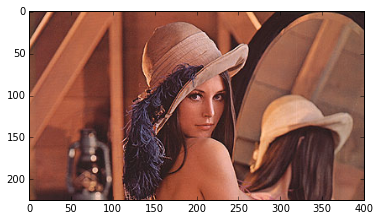

(225, 400, 3)


In [7]:
lenna = io.imread('images/lenna.jpg')
plt.imshow(lenna)
plt.show()
print lenna.shape

b) Convert the previous image to grayscale, visualize it and save it. Moreover, show both images (RGB & greyscale) details such as shape, dtype, max and min values. Comment your solution.

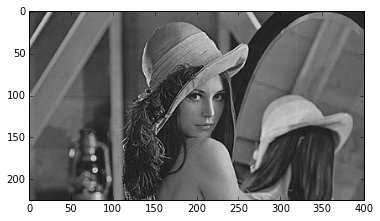

Lenna_Gray float64 0.98699372549 0.0014137254902
Lenna uint8 255 0


/Users/Jose/anaconda/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [8]:
from skimage.color import rgb2gray
lenna_gray = rgb2gray(lenna)
plt.imshow(lenna_gray,cmap='gray')
plt.show()
io.imsave('images/lenna_gray.bmp', lenna_gray)
print "Lenna_Gray",lenna_gray.dtype, lenna_gray.max(), lenna_gray.min()
print "Lenna", lenna.dtype, lenna.max(), lenna.min()

c) Convert the 'lenna.jpg' image into a boolean image, by applying a binarization to the grayscale image. This should be done by setting to 0 all values equal or below 100 and to 1 otherwise. Check the range of the values of the image, and print the 10th row. Comment your solution.

In [9]:
from skimage import img_as_ubyte
lenna_boolean = img_as_ubyte(lenna_gray)
lenna_boolean[(lenna_boolean<=100)] = 0
lenna_boolean[(lenna_boolean>100)] = 1
print "min =", lenna_boolean.min(), "max =",lenna_boolean.max()
print lenna_boolean[10]

min = 0 max = 1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


d) Visualize in the same figure three images: (1) the original image, (2) the graylevel image, and (3) the binarized image. Add the corresponding titles of the images when visualizing them. Comment your solution.

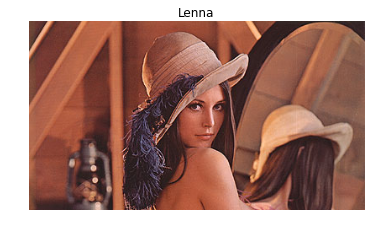

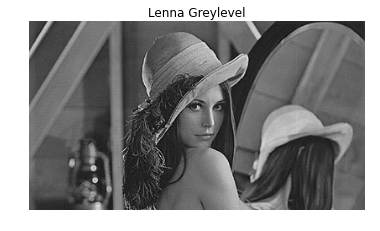

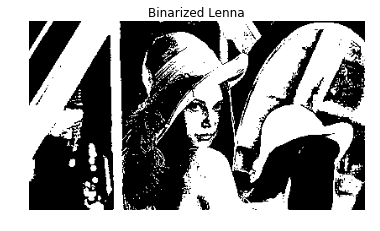

In [10]:
fig, ax = plt.subplots()
fig, ax2 = plt.subplots()
fig, ax3 = plt.subplots()
ax.axis('off')
ax2.axis('off')
ax3.axis('off')
ax.imshow(lenna)
ax2.imshow(lenna_gray, cmap='gray')
ax3.imshow(lenna_boolean, cmap='gray')
ax.set_title('Lenna')
ax2.set_title('Lenna Greylevel')
ax3.set_title('Binarized Lenna')

### 1.4 Images manipulation

a) Create a black mask with width 1/10th of the height of the original image `lenna.jpg` and display it. To do it, create a bigger black image and embed the original one. Comment your solution.

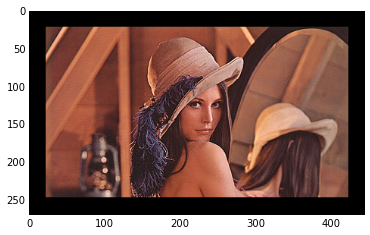

In [11]:
middle = lenna.shape[0]/10
width = lenna.shape[1]
height = lenna.shape[0]
black_mask = np.zeros((lenna.shape[0]+ 2*middle,lenna.shape[1] + 2*middle,3), dtype = 'uint8')
black_mask[middle:height+middle,middle:width+middle] = lenna
plt.imshow(black_mask)
plt.show()
        


b) Change the mask of the framed image to red. Visualize the three images with their respective titles. Comment your solution.

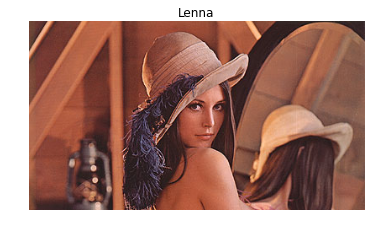

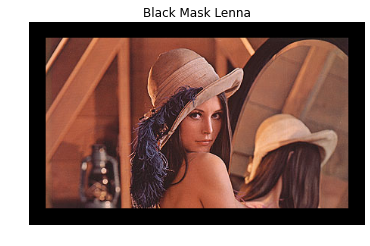

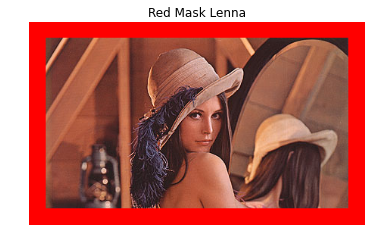

In [12]:
red_mask = black_mask.copy()
red_mask[:middle,:,0] = 255
red_mask[:,:middle,0] = 255
red_mask[height+middle:,:,0] = 255
red_mask[:,width+middle:,0] = 255

fig, ax = plt.subplots()
fig, ax2 = plt.subplots()
fig, ax3 = plt.subplots()
ax.axis('off')
ax2.axis('off')
ax3.axis('off')
ax.imshow(lenna)
ax2.imshow(black_mask)
ax3.imshow(red_mask)
ax.set_title('Lenna')
ax2.set_title('Black Mask Lenna')
ax3.set_title('Red Mask Lenna')


### 1.5 Contrast enhancement

a) Open the image `car_lowContrast.jpg` and visualize it without graylevel enhancement. To this purpose, check which are the minimal and maximal values and how to use the command imshow without contrast enhancement.

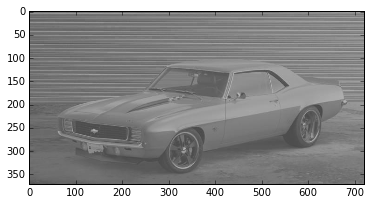

193
63


In [13]:
car_low = io.imread("images/car_lowContrast.jpg")
plt.imshow(car_low, cmap='gray', vmin = 0, vmax = 255)
plt.show()
print car_low.max()
print car_low.min()

b) Create an image called `dark_image` using the  values from the original one, so that the minimal value of the new image is 0. Check the minimal and maximal values of the new image, and compare them with the previous one.

130
0


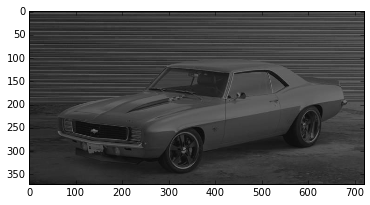

In [14]:
dark_image = car_low.copy()
dark_image  = dark_image - car_low.min()
print dark_image.max()
print dark_image.min()
plt.imshow(dark_image,cmap='gray', vmin = 0, vmax = 255)
plt.show()

c) Create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and compare them with the previous one.

255
125


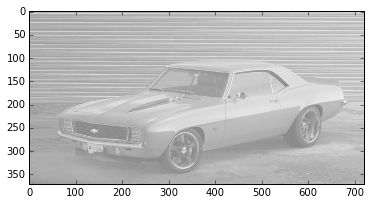

In [15]:
bright_im = car_low.copy()
bright_im = bright_im + (255-car_low.max())
print bright_im.max()
print bright_im.min()
plt.imshow(bright_im, cmap='gray', vmin = 0, vmax = 255)
plt.show()

d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through a scikit-image command. Check the minimal and maximal values of the enhanced image, and compare them with the previous one.

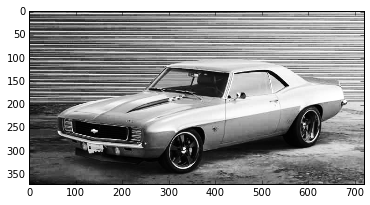

1.0
3.74363581911e-06


In [16]:
from skimage import exposure
car_enhanced = exposure.equalize_hist(car_low)
plt.imshow(car_enhanced, cmap='gray')
plt.show()
print car_enhanced.max()
print car_enhanced.min()


e) Visualize the 5 images in the same figure, each one with its corresponding title.

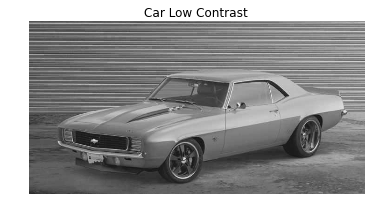

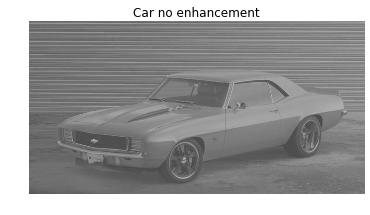

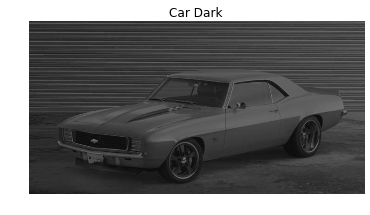

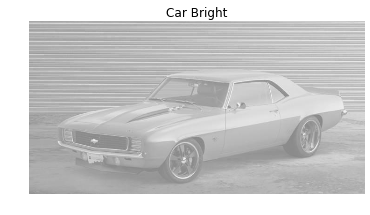

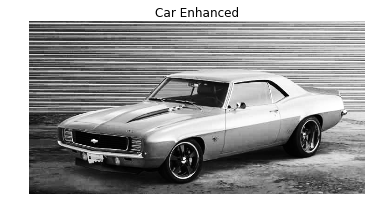

In [17]:
fig, ax = plt.subplots()
fig, ax2 = plt.subplots()
fig, ax3 = plt.subplots()
fig, ax4 = plt.subplots()
fig, ax5 = plt.subplots()
ax.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax.set_title('Car Low Contrast')
ax2.set_title('Car no enhancement')
ax3.set_title('Car Dark')
ax4.set_title('Car Bright')
ax5.set_title('Car Enhanced')
ax.imshow(car_low, cmap='gray')
ax2.imshow(car_low, cmap='gray', vmin = 0, vmax = 255)
ax3.imshow(dark_image, cmap='gray', vmin = 0, vmax = 255)
ax4.imshow(bright_im, cmap='gray', vmin = 0, vmax = 255)
ax5.imshow(car_enhanced, cmap='gray')

### 1.6 Masks and logical image manipulation

Read the image `circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

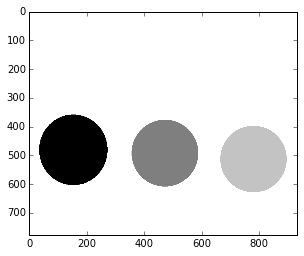

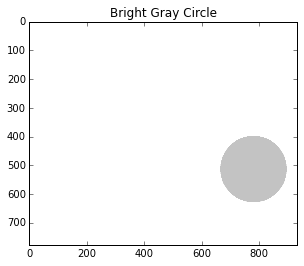

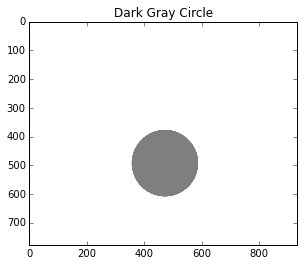

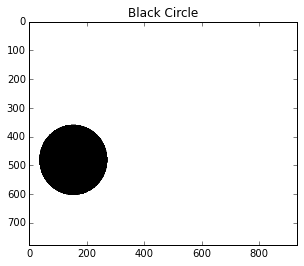

In [18]:
circles = io.imread("images/circles.bmp")
plt.imshow(circles)
plt.show()

bright_gray = circles.copy()
dark_gray = circles.copy()
black_circle = circles.copy()

low_gray = circles[500,800]
high_gray = circles[500,400]
black = circles[500,200]

bright_gray[(circles != low_gray)] = 255
dark_gray[(circles != high_gray)] = 255
black_circle[(circles != black)] = 255



fig, ax = plt.subplots()
fig, ax2 = plt.subplots()
fig, ax3 = plt.subplots()

ax.set_title('Bright Gray Circle')
ax2.set_title('Dark Gray Circle')
ax3.set_title('Black Circle')
ax.imshow(bright_gray, cmap='gray')
ax2.imshow(dark_gray, cmap='gray')
ax3.imshow(black_circle, cmap='gray')


### 1.7 Color manipulation

a) Create and visualize the three images shown in the following figure:
<img src="./images_notebook/ex17a.png">

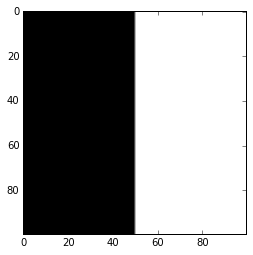

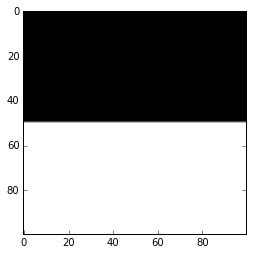

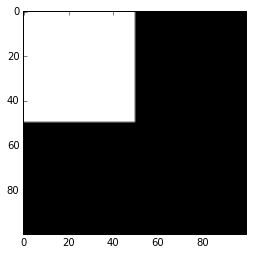

In [19]:
square = np.zeros((100,100,3), dtype = 'uint8')

square_row = square.copy()
square_row[50:100,:] = 255
square_col = square.copy()
square_col[:,50:100:] = 255
plt.imshow(square_col)
plt.show()
plt.imshow(square_row)
plt.show()
square_sq = square.copy()
square_sq[0:50,0:50:] = 255
plt.imshow(square_sq)
plt.show()

b) Using these three images, construct the following color image:
<img src='./images_notebook/ex17b.png'>

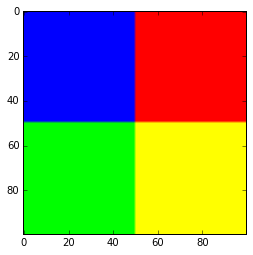

In [20]:
combinada = square.copy()
combinada[:,:,0] = square_col[:,:,0]
combinada[:,:,1] = square_row[:,:,1]
combinada[:,:,2] = square_sq[:,:,2]
plt.imshow(combinada)
plt.show()

c) Read and visualize the image `sillas.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/ex17c.png">

<img src="images_notebook/ex17c2.png">

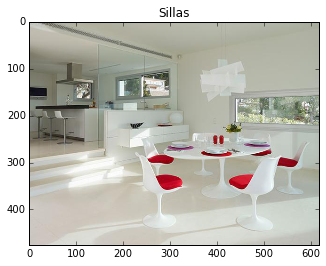

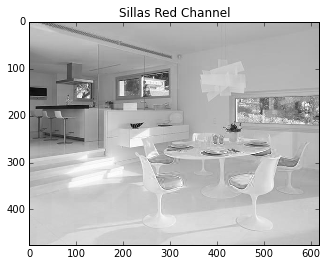

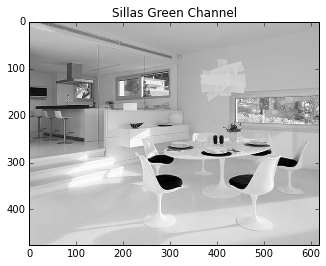

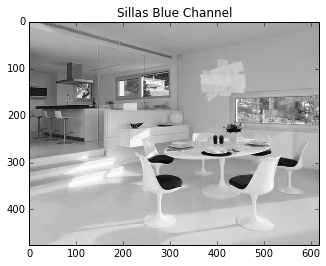

In [21]:
sillas = io.imread("images/sillas.jpg")

sillas_red = sillas[:,:,0]
sillas_green = sillas[:,:,1]
sillas_blue = sillas[:,:,2]

fig, ax = plt.subplots()
fig, ax2 = plt.subplots()
fig, ax3 = plt.subplots()
fig, ax4 = plt.subplots()

ax.set_title('Sillas')
ax2.set_title('Sillas Red Channel')
ax3.set_title('Sillas Green Channel')
ax4.set_title('Sillas Blue Channel')
ax.imshow(sillas)
ax2.imshow(sillas_red, cmap='gray')
ax3.imshow(sillas_green, cmap='gray')
ax4.imshow(sillas_blue, cmap='gray')

d) Construct and visualize a new image in which the red color of the chairs is changed to blue (see figure).
<img src="images_notebook/ex17c3.png">

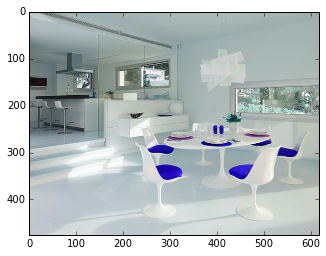

In [22]:
blue_chairs = sillas.copy()
blue_chairs[:,:,2] = sillas[:,:,0]
blue_chairs[:,:,0] = sillas[:,:,2]

plt.imshow(blue_chairs)
plt.show()

e) Given the images `coat.png` and `model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying resize, rotate, etc. keep track how the image type and values range change. When necessary, apply type conversion using img_as_float, img_as_uint, img_as_ubyte.

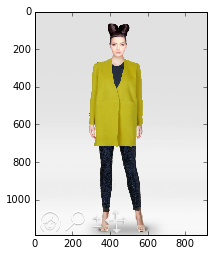

In [69]:
from skimage.transform import rescale
coat = io.imread("images/coat.png")
model = io.imread("images/model.png")

shape = np.shape(model)

model_coat = model.copy()

#sabem que no es eficient fer servir un for, pero no sabiem fer l'assignació de valors per matrius directament.
for i in range(0,shape[0]):
    for j in range(0,shape[1]):
        if coat[i,j,:2].any() > 0:
            model_coat[i,j] = coat[i,j]
            
plt.imshow(model_coat)
plt.show()



## Delivery

Compress your file named **P1_Student1_Student2.zip** that includes:
- The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used (if any) that are not provided in P1.zip.

**Deadline (only through Campus Virtual): October 3, 11:00 p.m.** 